In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import csv
import numpy as np

# polymod = {
#     '0-5': [44236,116622,156931,187214,97386,19080],
#     '5-10': [48285,113537,193144,188499,78881,13555],
#     '10-15': [45121,151975,235961,171061,58824,10525],
#     '15-20': [58741,193726,243460,140974,47649,9027]
# }

# comix = {
#     '0-5': [18976,91095,180858,212707,124567,28865],
#     '5-10': [29136,119719,196693,212306,111500,29158],
#     '10-15': [44691,135971,192960,192450,116220,26419],
#     '15-20': [44236,116622,156931,187214,97386,19080]
# }

# # age_additions = [3,8,13,18]
# age_additions = {
#     '0-5': 3,
#     '5-10': 8,
#     '10-15': 13,
#     '15-20': 18
# }
# age_base = [17.5,22.5,27.5,32.5,37.5,42.5]



/Users/thomash1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/thomash1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# polymod_prop = polymod
# comix_prop = comix


# for a in polymod:
    
#     p_sum = sum(polymod[a])
#     c_sum = sum(comix[a])
    
#     for b in range(len(age_base)):
#         polymod_prop[a][b] = polymod[a][b] / p_sum
#         comix_prop[a][b] = comix[a][b] / c_sum

        

In [3]:


# target_group = '10-15'

# age_labels = {
#     '0-5': ['Under 23', '[23,28)', '[28,33)', '[33,38)', '[38,43)', '43+'],
#     '5-10': ['Under 28', '[28,33)', '[33,38)', '[38,43)', '[43,48)', '48+'],
#     '10-15': ['Under 33', '[33,38)', '[38,43)', '[43,48)', '[48,53)', '53+'],
#     '15-20': ['Under 38', '[38,43)', '[43,48)', '[48,53)', '[53,58)', '58+']
# }

# fig, axs = plt.subplots(ncols=2, nrows=2)

# subplot_map_0 = {
#     '0-5': 0,
#     '5-10': 0,
#     '10-15': 1,
#     '15-20': 1
# }

# subplot_map_1 = {
#     '0-5': 0,
#     '5-10': 1,
#     '10-15': 0,
#     '15-20': 1
# }


# for target_group in age_labels:

#     x = age_labels[target_group]

#     polymod_dic = {'Age': x + x, 'Survey': ['POLYMOD'] * 6 + ['CoMix'] * 6, '# parents': polymod[target_group] + comix[target_group]}

#     polymod_dic = {'Age': x + x, 'Survey': ['POLYMOD'] * 6 + ['CoMix'] * 6, '# parents': polymod_prop[target_group] + comix_prop[target_group]}


#     data = pd.DataFrame(polymod_dic)

#     sb.barplot(data=data, x='Age', y='# parents', hue='Survey', ax=axs[subplot_map_0[target_group]][subplot_map_1[target_group]])

# plt.savefig('age')



In [ ]:
birth_counts = {}

start_reading = False

with open('Data/birthsummary2022workbook.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in reader:
        if start_reading:
            birth_counts[int(row[0])] = []
#             print(int(row[2].replace(',', '')))
            for i in row[2:8]:
                birth_counts[int(row[0])].append(int(i.replace(',', '')))
        if row[0] == "2021":
            start_reading = True
        if row[0] == "1980":
            start_reading = False
            

In [4]:
comix_read = 2020
polymod_read = 2005

parental_age_diff = 3
portion_dads = 1.0

comix_parents = []
for i in range(4):
    comix_parents.append([])
polymod_parents = []
for i in range(4):
    polymod_parents.append([])

age_groups = [[15,20],[20,25],[25,30],[30,35],[35,40],[40,45]]

# comix
for i in range(1980,2021):
    age = comix_read - i
    if 5 > age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[0] = comix_parents[0] + num_parents * [age + k]# + num_parents * [age + k + parental_age_diff] # mothers
#                 comix_parents[0] = comix_parents[0] + int(portion_dads * num_parents) * [age + k + parental_age_diff] # fathers
    if 10 > age and 5 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[1] = comix_parents[1] + num_parents * [age + k] # mothers
#                 comix_parents[1] = comix_parents[1] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
    if 15 > age and 10 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[2] = comix_parents[2] + num_parents * [age + k] # mothers
#                 comix_parents[2] = comix_parents[2] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
    if 20 > age and 15 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[3] = comix_parents[3] + num_parents * [age + k] # mothers
#                 comix_parents[3] = comix_parents[3] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
                
# polymod
for i in range(1980,polymod_read+1):
    age = polymod_read - i
    if 5 > age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[0] = polymod_parents[0] + num_parents * [age + k] # mothers
#                 polymod_parents[0] = polymod_parents[0] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
    if 10 > age and 5 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[1] = polymod_parents[1] + num_parents * [age + k] # mothers
#                 polymod_parents[1] = polymod_parents[1] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
    if 15 > age and 10 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[2] = polymod_parents[2] + num_parents * [age + k] # mothers
#                 polymod_parents[2] = polymod_parents[2] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
    if 20 > age and 15 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[3] = polymod_parents[3] + num_parents * [age + k] # mothers
#                 polymod_parents[3] = polymod_parents[3] + int(portion_dads * num_parents) * [int(age + k + parental_age_diff)] # fathers
                
                
            

    

In [ ]:
# filter old fathers

# for i in range(4):
#     polymod_parents


{'0-4': [133666, 443262, 704329, 875645, 662246, 243373, 35199], '5-9': [140997, 429560, 794757, 957936, 615257, 190530, 25698], '10-14': [132250, 531197, 1015442, 1012534, 518085, 145297, 20340], '15-19': [169715, 675317, 1118407, 910148, 418770, 120849, 16709]}


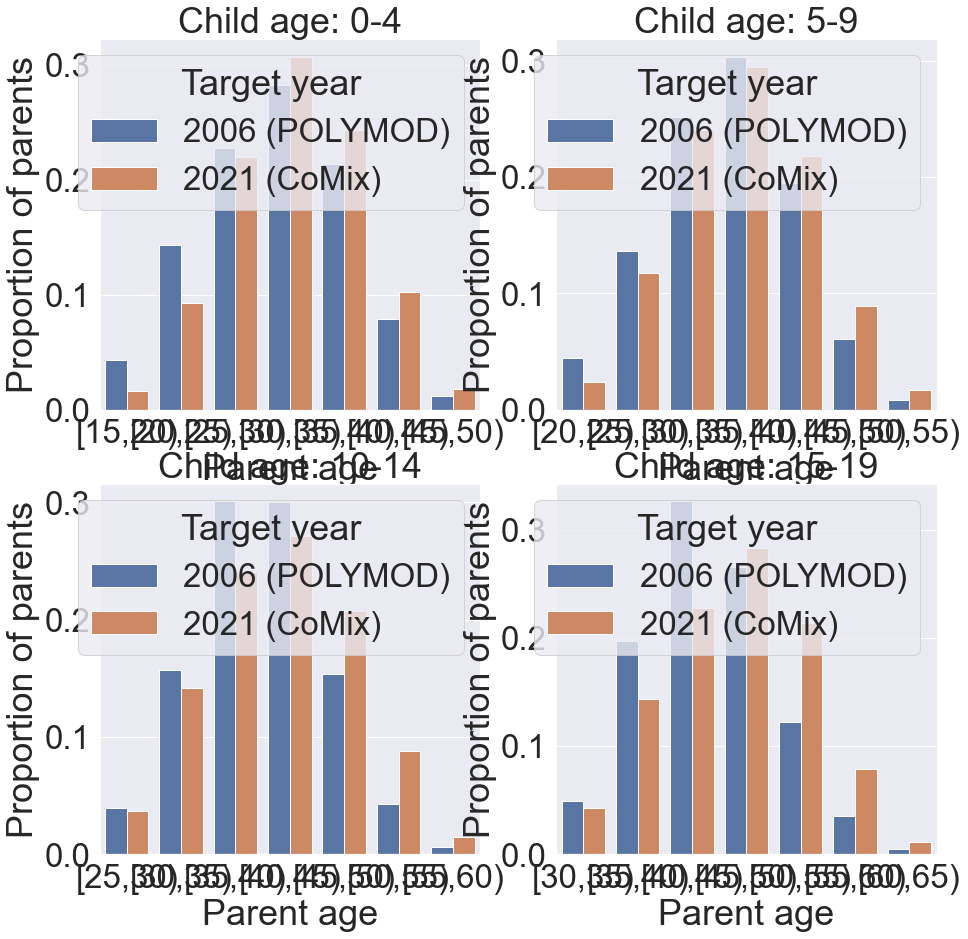

In [16]:
# manual binning

polymod_parents_binned = {
    '0-4': list(np.unique(np.digitize(polymod_parents[0],bins=range(15,47,5)),return_counts=True)[1]),
    '5-9': list(np.unique(np.digitize(polymod_parents[1],bins=range(20,52,5)),return_counts=True)[1]),
    '10-14': list(np.unique(np.digitize(polymod_parents[2],bins=range(25,57,5)),return_counts=True)[1]),
    '15-19': list(np.unique(np.digitize(polymod_parents[3],bins=range(30,62,5)),return_counts=True)[1])
}

comix_parents_binned = {
    '0-4': list(np.unique(np.digitize(comix_parents[0],bins=range(15,47,5)),return_counts=True)[1]),
    '5-9': list(np.unique(np.digitize(comix_parents[1],bins=range(20,52,5)),return_counts=True)[1]),
    '10-14': list(np.unique(np.digitize(comix_parents[2],bins=range(25,57,5)),return_counts=True)[1]),
    '15-19': list(np.unique(np.digitize(comix_parents[3],bins=range(30,62,5)),return_counts=True)[1])
}


# normalise
polymod_parents_binned_norm = polymod_parents_binned
comix_parents_binned_norm = comix_parents_binned

print(polymod_parents_binned)

for a in polymod_parents_binned:
    
    p_sum = sum(polymod_parents_binned[a])
    c_sum = sum(comix_parents_binned[a])
    
    for b in range(len(polymod_parents_binned[a])):
        polymod_parents_binned_norm[a][b] = polymod_parents_binned[a][b] / p_sum
        comix_parents_binned_norm[a][b] = comix_parents_binned[a][b] / c_sum
        
        
# dataframe construction

age_labels = {
    '0-4': ['[15,20)','[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)'],#, '[50,55)'],
    '5-9': ['[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)'],#, '[55,60)'],
    '10-14': ['[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)'],#, '[60,65)'],
    '15-19': ['[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)', '[60,65)'],#, '[65,70)']
}


subplot_map_0 = {
    '0-4': 0,
    '5-9': 0,
    '10-14': 1,
    '15-19': 1
}

subplot_map_1 = {
    '0-4': 0,
    '5-9': 1,
    '10-14': 0,
    '15-19': 1
}

fig, axs = plt.subplots(ncols=2, nrows=2)

for target_group in age_labels:

    x = age_labels[target_group]

    data_dic = {'Parent age': x + x, 'Target year': ['2006 (POLYMOD)'] * 7 + ['2021 (CoMix)'] * 7, 'Proportion of parents': polymod_parents_binned_norm[target_group] + comix_parents_binned_norm[target_group]}

    data = pd.DataFrame(data_dic)

    sb.barplot(data=data, x='Parent age', y='Proportion of parents', hue='Target year', ax=axs[subplot_map_0[target_group]][subplot_map_1[target_group]]).set_title('Child age: ' + target_group)

fig.set_figheight(15)
fig.set_figwidth(15)

# fig.savefig('test3')



<AxesSubplot:ylabel='Proportion'>

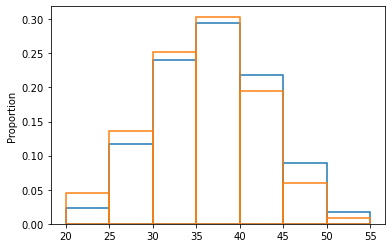

In [75]:
# fig, axs = plt.subplots(nrows=2, ncols=2)

sb.histplot(comix_parents[1], bins=range(20,57,5), stat='proportion', fill=False)
sb.histplot(polymod_parents[1], bins=range(20,57,5), stat='proportion', fill=False)


<AxesSubplot:ylabel='Proportion'>

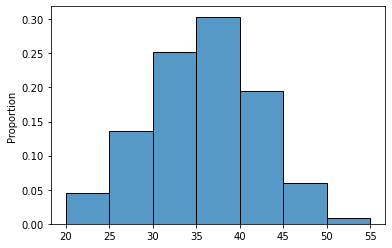

In [64]:
sb.histplot(polymod_parents[1], bins=range(20,57,5), stat='proportion')

In [17]:
polymod_measured = {
    '0-4': [0.002853029,
            0.003907394,
            0.0083185210,
            0.009508341,
            0.007681956,
            0.0034425875,
            0.003631391
            ],
    '5-9': [0.003046008,
            0.0063184205,
            0.011279664,
            0.011867244,
            0.0094526546,
            0.003347240,
            0.0023261347
            ],
    '10-14': [0.0018543901,
              0.005910899,
              0.009442782,
              0.0113158916,
              0.005532764,
              0.0035213408,
              0.0031549948
              ],
    '15-19': [0.002458984,
             0.005251187,
             0.0080383863,
             0.007411138,
             0.0043762855,
             0.0023379813,
             0.001878485
             ]
}

comix_measured = {
    '0-4': [0.00178323623544144,#0.0018485399,
            0.00329945007672424, #0.0032608126,
            0.00732018445628991, #0.0073929329,
            0.0130817852677296, #0.0130961080,
            0.016080643950954, #0.0159956835,
            0.00987625970233636, #0.009931377,
            0.00324323086004546], #0.003216096],
    '5-9': [0.00179623711847413, #0.0017796793,		
             0.00296273570579302, #0.0029075626,
             0.00661298526341455, #0.0065554183,
             0.0122797810117827, #0.0123721329,
             0.0127803935586307, #0.012827302,
             0.00915019049629467, #0.009186792,
             0.00434722798139341], #0.0043514265],
    '10-14': [0.00236954467215747, #0.0024222984,	
              0.00426220405014293, #0.0043140441,
              0.00866056887381744, #0.0084996707,
              0.0112465193765622, #0.011492810,
              0.0120038395724526, #0.011748374,
              0.00771998801632441, #0.0076108350,
              0.00376695452743777], #.003887193],
    '15-19': [0.0027516468378785, #0.0028757003, 	
              0.00365054041558261, #0.0036376550,
              0.00669270976002071, #0.006763720,
              0.00922291874443449, #0.009102106,
              0.00802913816260479, #0.0080981263,
              0.00524608376320807, #0.005277995,
              0.00292451056875256] #0.003073745]
}

polymod_prop_measured = polymod_measured
comix_prop_measured = comix_measured


for a in polymod_measured:
    
    p_sum = sum(polymod_measured[a])
    c_sum = sum(comix_measured[a])
    
    for b in range(len(polymod_measured[a])):
        polymod_prop_measured[a][b] = polymod_measured[a][b] / p_sum
        comix_prop_measured[a][b] = comix_measured[a][b] / c_sum
        
        
# age_labels_measured = {
#     '0-4': ['[15,20)','[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)'],
#     '5-9': ['[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)'],
#     '10-14': ['[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)'],
#     '15-19': ['[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)', '[60,65)']
# }

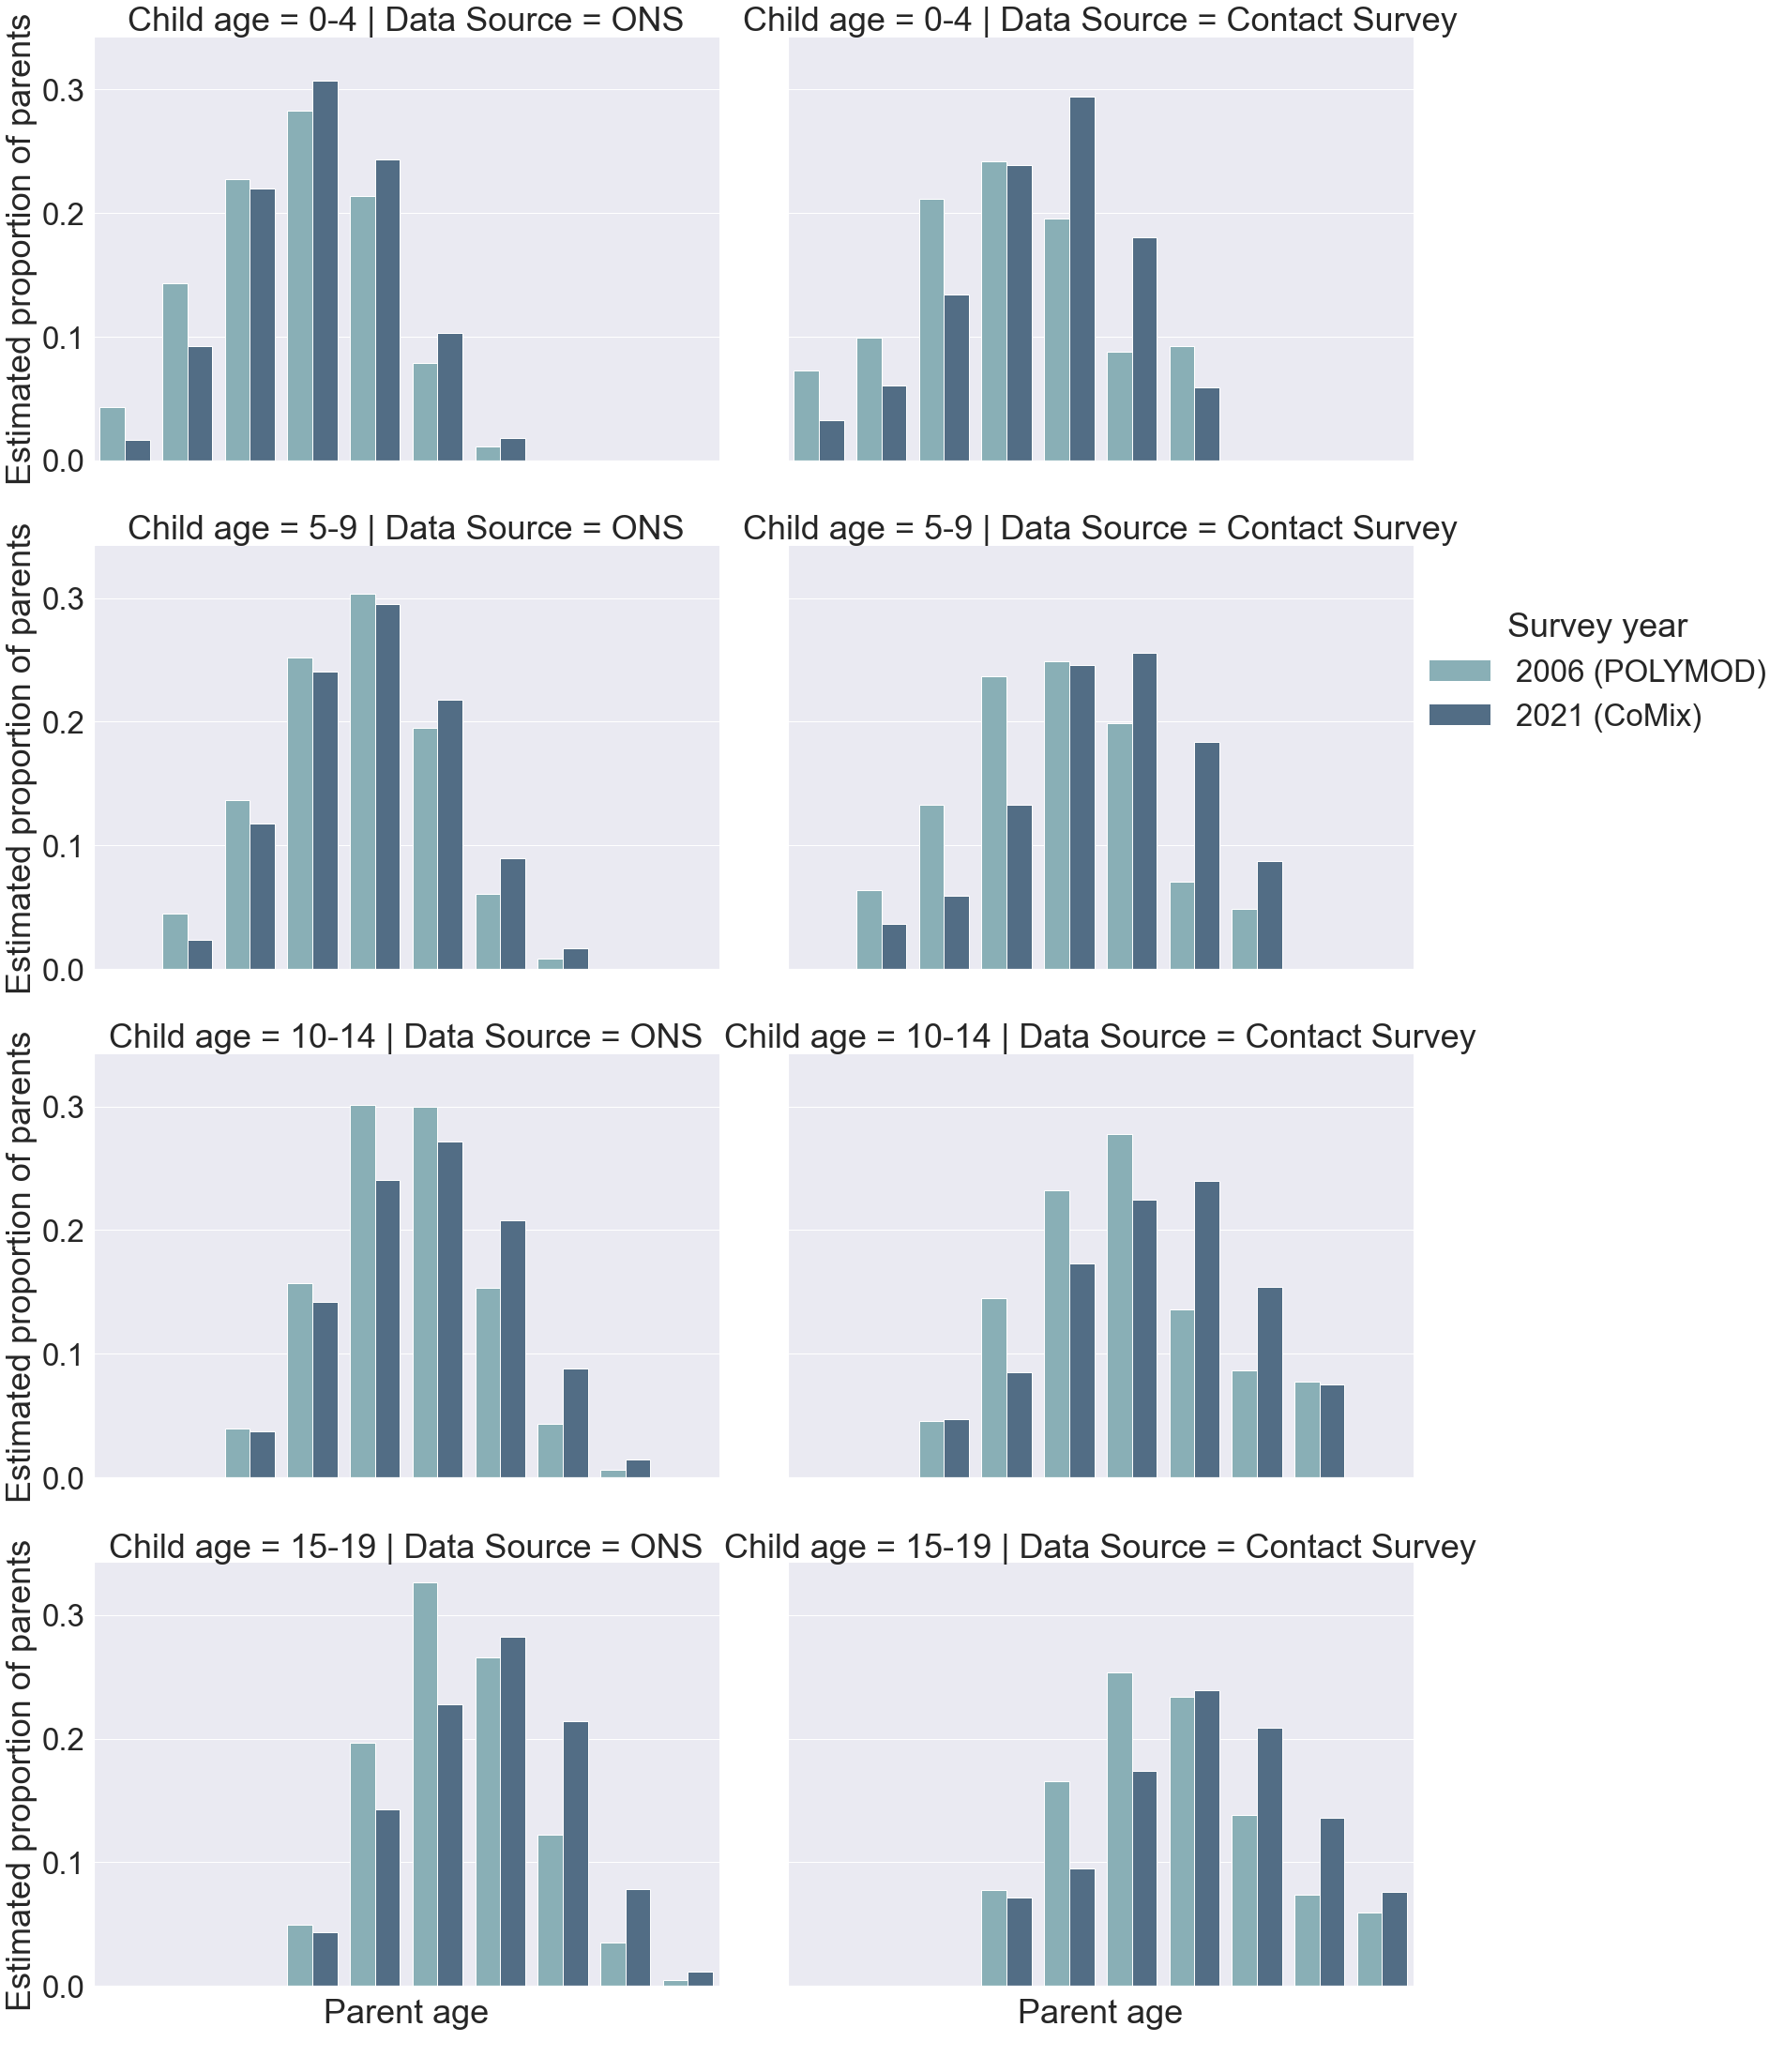

In [18]:
# fig, axs = plt.subplots()


x = []
y = []
z = []
i = []

age_labels = {
    '0-4': ['[15,20)','[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)'],#, '[50,55)'],
    '5-9': ['[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)'],#, '[55,60)'],
    '10-14': ['[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)'],#, '[60,65)'],
    '15-19': ['[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)', '[60,65)']#, '[65,70)']
}

for target_group in age_labels:
    x = x + age_labels[target_group] * 4
#     x = x + age_labels[target_group]
    
    y = y + polymod_parents_binned_norm[target_group]
    y = y + comix_parents_binned_norm[target_group]
    y = y + polymod_prop_measured[target_group]
    y = y + comix_prop_measured[target_group]
    
    z = z + [target_group] * 28
    
#     i = i + 
    

data_dic = {'Parent age\n': x, 
            'Child age': z,
            'Data Source': 4 * (['ONS'] * 14 + ['Contact Survey'] * 14), #1 * (['ONS'] * 16 + ['Contact Survey'] * 16),
            'Survey year': 8 * (['2006 (POLYMOD)'] * 7 + ['2021 (CoMix)'] * 7), #2 * (['2006 (POLYMOD)'] * 8 + ['2021 (CoMix)'] * 8), 
            'Estimated proportion of parents': y,
           }

data = pd.DataFrame(data_dic)

# data

# sb.heatmap(data=data, x='Parent age', y='Child age', hue='Proportion of parents').set_title('Child age: ' + target_group)

# fig.set_figheight(15)
# fig.set_figwidth(15)

# fig.savefig('test3')

# Initialize the FacetGrid object
pal = sb.cubehelix_palette(2, rot=-.25, light=0.65, dark = 0.4)
# g = sb.FacetGrid(data, row="Child age", col="Target year", hue="Demographics", aspect=4, height=2, palette=pal)

# # times = data.interval.unique()

# g.map_dataframe(sb.barplot, x="Parent age", y="Proportion of parents", order=["Parent age","Child age"]),
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)


# g.set_figheight(15)
# g.set_figwidth(15)

sb.set(font_scale=3)

cat_plot = sb.catplot(
    data=data, kind="bar",
    x="Parent age\n", y="Estimated proportion of parents", col="Data Source", hue="Survey year", row="Child age",
    height=8, aspect=1.4, palette=pal,
).set_xticklabels(rotation=90)

sb.move_legend(cat_plot, "center right", bbox_to_anchor=(1, 0.675))

fig = cat_plot.fig



# fig.savefig("full_ONS_surveys.pdf") 

In [19]:
data

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# # Initialize the FacetGrid object
# pal = sb.cubehelix_palette(10, rot=-.25, light=.7)
# g = sb.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(sb.kdeplot, "x",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sb.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)

,Parent age\n,Child age,Data Source,Survey year,Estimated proportion of parents
0,"[15,20)",0-4,ONS,2006 (POLYMOD),0.043150
1,"[20,25)",0-4,ONS,2006 (POLYMOD),0.143093
2,"[25,30)",0-4,ONS,2006 (POLYMOD),0.227370
3,"[30,35)",0-4,ONS,2006 (POLYMOD),0.282674
4,"[35,40)",0-4,ONS,2006 (POLYMOD),0.213785
...,...,...,...,...,...
107,"[40,45)",15-19,Contact Survey,2021 (CoMix),0.173757
108,"[45,50)",15-19,Contact Survey,2021 (CoMix),0.239447
109,"[50,55)",15-19,Contact Survey,2021 (CoMix),0.208454
110,"[55,60)",15-19,Contact Survey,2021 (CoMix),0.136200


In [9]:
polymod_parents_binned = {
    '0-4': list(np.unique(np.digitize(polymod_parents[0],bins=range(15,47,5)),return_counts=True)[1]),
    '5-9': list(np.unique(np.digitize(polymod_parents[1],bins=range(20,52,5)),return_counts=True)[1]),
    '10-14': list(np.unique(np.digitize(polymod_parents[2],bins=range(25,57,5)),return_counts=True)[1]),
    '15-19': list(np.unique(np.digitize(polymod_parents[3],bins=range(30,62,5)),return_counts=True)[1])
}

comix_parents_binned = {
    '0-4': list(np.unique(np.digitize(comix_parents[0],bins=range(15,47,5)),return_counts=True)[1]),
    '5-9': list(np.unique(np.digitize(comix_parents[1],bins=range(20,52,5)),return_counts=True)[1]),
    '10-14': list(np.unique(np.digitize(comix_parents[2],bins=range(25,57,5)),return_counts=True)[1]),
    '15-19': list(np.unique(np.digitize(comix_parents[3],bins=range(30,62,5)),return_counts=True)[1])
}

polymod_measured = {
    '0-4': [0.002853029,
            0.003907394,
            0.0083185210,
            0.009508341,
            0.007681956,
            0.0034425875,
            0.003631391
            ],
    '5-9': [0.003046008,
            0.0063184205,
            0.011279664,
            0.011867244,
            0.0094526546,
            0.003347240,
            0.0023261347
            ],
    '10-14': [0.0018543901,
              0.005910899,
              0.009442782,
              0.0113158916,
              0.005532764,
              0.0035213408,
              0.0031549948
              ],
    '15-19': [0.002458984,
             0.005251187,
             0.0080383863,
             0.007411138,
             0.0043762855,
             0.0023379813,
             0.001878485
             ]
}

comix_measured = {
    '0-4': [0.00178323623544144,#0.0018485399,
            0.00329945007672424, #0.0032608126,
            0.00732018445628991, #0.0073929329,
            0.0130817852677296, #0.0130961080,
            0.016080643950954, #0.0159956835,
            0.00987625970233636, #0.009931377,
            0.00324323086004546], #0.003216096],
    '5-9': [0.00179623711847413, #0.0017796793,		
             0.00296273570579302, #0.0029075626,
             0.00661298526341455, #0.0065554183,
             0.0122797810117827, #0.0123721329,
             0.0127803935586307, #0.012827302,
             0.00915019049629467, #0.009186792,
             0.00434722798139341], #0.0043514265],
    '10-14': [0.00236954467215747, #0.0024222984,	
              0.00426220405014293, #0.0043140441,
              0.00866056887381744, #0.0084996707,
              0.0112465193765622, #0.011492810,
              0.0120038395724526, #0.011748374,
              0.00771998801632441, #0.0076108350,
              0.00376695452743777], #.003887193],
    '15-19': [0.0027516468378785, #0.0028757003, 	
              0.00365054041558261, #0.0036376550,
              0.00669270976002071, #0.006763720,
              0.00922291874443449, #0.009102106,
              0.00802913816260479, #0.0080981263,
              0.00524608376320807, #0.005277995,
              0.00292451056875256] #0.003073745]
}


def transform_parents_to_children(age_dist):
    temp = {
    '15-19': [age_dist['0-4'][0],
            0,
            0,
            0
            ],
    '20-24': [age_dist['0-4'][1],
            age_dist['5-9'][0],
            0,
            0
            ],
    '25-29': [age_dist['0-4'][2],
            age_dist['5-9'][1],
            age_dist['10-14'][0],
            0
              ],
    '30-34': [age_dist['0-4'][3],
            age_dist['5-9'][2],
            age_dist['10-14'][1],
            age_dist['15-19'][0]
             ],
    '35-39': [age_dist['0-4'][4],
            age_dist['5-9'][3],
            age_dist['10-14'][2],
            age_dist['15-19'][1]
            ],
    '40-44': [age_dist['0-4'][5],
            age_dist['5-9'][4],
            age_dist['10-14'][3],
            age_dist['15-19'][2]
              ],
    '45-49': [age_dist['0-4'][6],
            age_dist['5-9'][5],
            age_dist['10-14'][4],
            age_dist['15-19'][3]
             ],
    '50-54': [0,
            age_dist['5-9'][6],
            age_dist['10-14'][5],
            age_dist['15-19'][4]
            ],
    '55-59': [0,
            0,
            age_dist['10-14'][6],
            age_dist['15-19'][5]
              ],
    '60-64': [0,
            0,
            0,
            age_dist['15-19'][6]
             ]
    }
    return temp

polymod_children_binned = transform_parents_to_children(polymod_parents_binned)
comix_children_binned = transform_parents_to_children(comix_parents_binned)

polymod_children_measured = transform_parents_to_children(polymod_measured)
comix_children_measured = transform_parents_to_children(comix_measured)

polymod_children_prop_binned = polymod_children_binned
comix_children_prop_binned = comix_children_binned

polymod_children_prop_measured = polymod_children_measured
comix_children_prop_measured = comix_children_measured

for a in polymod_children_measured:
    
    p_sum_binned = sum(polymod_children_binned[a])
    c_sum_binned = sum(comix_children_binned[a])
    
    p_sum_measured = sum(polymod_children_measured[a])
    c_sum_measured = sum(comix_children_measured[a])
    
    for b in range(len(polymod_children_measured[a])):
        polymod_children_prop_binned[a][b] = polymod_children_binned[a][b] / p_sum_binned
        comix_children_prop_binned[a][b] = comix_children_binned[a][b] / c_sum_binned
        
        polymod_children_prop_measured[a][b] = polymod_children_measured[a][b] / p_sum_measured
        comix_children_prop_measured[a][b] = comix_children_measured[a][b] / c_sum_measured
    

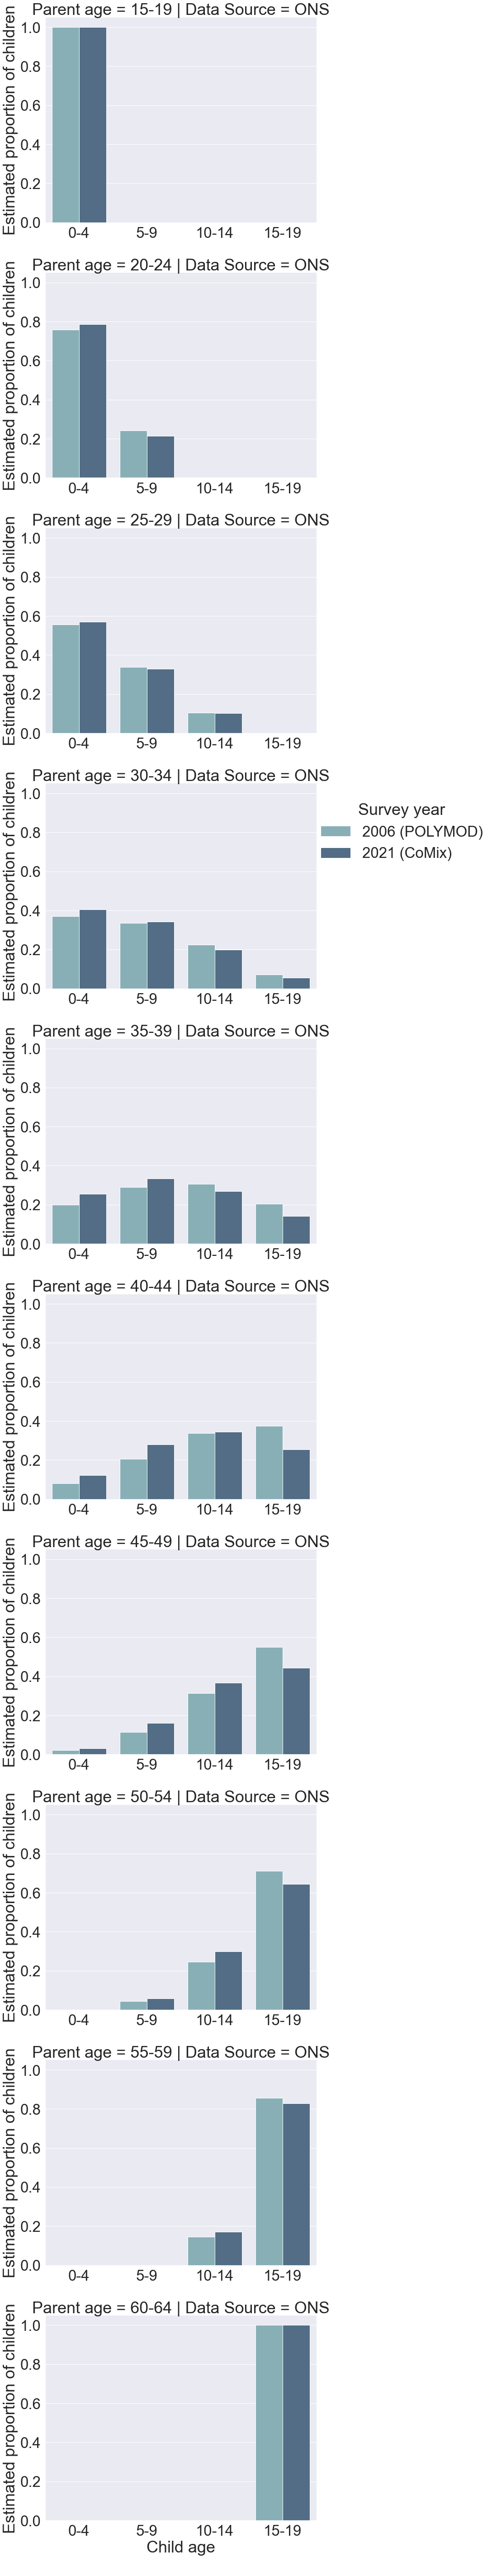

In [12]:
# fig, axs = plt.subplots()


x = []
y = []
z = []
i = []

age_labels = {
    '15-19': ['0-4','5-9','10-14','15-19'],
    '20-24': ['0-4','5-9','10-14','15-19'],
    '25-29': ['0-4','5-9','10-14','15-19'],
    '30-34': ['0-4','5-9','10-14','15-19'],
    '35-39': ['0-4','5-9','10-14','15-19'],
    '40-44': ['0-4','5-9','10-14','15-19'],
    '45-49': ['0-4','5-9','10-14','15-19'],
    '50-54': ['0-4','5-9','10-14','15-19'],
    '55-59': ['0-4','5-9','10-14','15-19'],
    '60-64': ['0-4','5-9','10-14','15-19']
    }

for target_group in age_labels:
    x = x + age_labels[target_group] * 2
#     x = x + age_labels[target_group]
    
    y = y + polymod_children_prop_binned[target_group]
    y = y + comix_children_prop_binned[target_group]
#     y = y + polymod_children_prop_measured[target_group]
#     y = y + comix_children_prop_measured[target_group]
    
    z = z + [target_group] * 8
    
#     i = i + 
    

data_dic = {'Child age\n': x, 
            'Parent age': z,
            'Data Source': 10 * (['ONS'] * 8),# + ['Contact Survey'] * 8), #1 * (['ONS'] * 16 + ['Contact Survey'] * 16),
            'Survey year': 10 * (['2006 (POLYMOD)'] * 4 + ['2021 (CoMix)'] * 4), #2 * (['2006 (POLYMOD)'] * 8 + ['2021 (CoMix)'] * 8), 
            'Estimated proportion of children': y,
           }

data = pd.DataFrame(data_dic)

# data

# sb.heatmap(data=data, x='Parent age', y='Child age', hue='Proportion of parents').set_title('Child age: ' + target_group)

# fig.set_figheight(15)
# fig.set_figwidth(15)

# fig.savefig('test3')

# Initialize the FacetGrid object
pal = sb.cubehelix_palette(2, rot=-.25, light=0.65, dark = 0.4)
# g = sb.FacetGrid(data, row="Child age", col="Target year", hue="Demographics", aspect=4, height=2, palette=pal)

# # times = data.interval.unique()

# g.map_dataframe(sb.barplot, x="Parent age", y="Proportion of parents", order=["Parent age","Child age"]),
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)


# g.set_figheight(15)
# g.set_figwidth(15)

sb.set(font_scale=3)

cat_plot = sb.catplot(
    data=data, kind="bar",
    x="Child age\n", y="Estimated proportion of children", col="Data Source", hue="Survey year", row="Parent age",
    height=8, aspect=1.4, palette=pal, sharex = False
)#.set_xticklabels(rotation=90)

sb.move_legend(cat_plot, "center right", bbox_to_anchor=(1, 0.675))

fig = cat_plot.fig




# fig.savefig("full_ONS_surveys_children.pdf") 

In [21]:
# Age density outputs

# Child
# data.to_csv('UK_child_age_density.csv')

# Parents
# data.to_csv('UK_parent_age_density.csv')

data

,Parent age\n,Child age,Data Source,Survey year,Estimated proportion of parents
0,"[15,20)",0-4,ONS,2006 (POLYMOD),0.043150
1,"[20,25)",0-4,ONS,2006 (POLYMOD),0.143093
2,"[25,30)",0-4,ONS,2006 (POLYMOD),0.227370
3,"[30,35)",0-4,ONS,2006 (POLYMOD),0.282674
4,"[35,40)",0-4,ONS,2006 (POLYMOD),0.213785
...,...,...,...,...,...
107,"[40,45)",15-19,Contact Survey,2021 (CoMix),0.173757
108,"[45,50)",15-19,Contact Survey,2021 (CoMix),0.239447
109,"[50,55)",15-19,Contact Survey,2021 (CoMix),0.208454
110,"[55,60)",15-19,Contact Survey,2021 (CoMix),0.136200
